<a id="top">

# 五王之战分析 - 冰与火之歌

By **Batu Mengkai**

## 目录
1. [简介](#intro)
2. [探索的问题](#questions)
3. [数据评估和清理](#wrangling)
4. [数据探索分析](#exploration)
5. [结论](#conculsion)
6. [反思](#reflection)

<a id="intro">

## 1. 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name:战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

<a id="questions">

## 2. 探索的问题

在此项目中，我将以一名数据分析师的身份执行数据的探索性分析，了解《冰与火之歌》中的内战信息。介于以上大量的信息，我将探索以下几个问题：
- 哪一个区域发生了最多的战争？
- 哪一个国王获得了最多的胜利？
- 战争的胜利与否受那些关键因素的影响？
- 攻击方力量大小和防御方力量大小有什么关系？

<a id = "wrangling">

## 3. 数据评估和清理

In [1]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# TO DO: load the dataset
df = pd.read_csv('battles.csv')
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


确定数据加载正确。

In [3]:
#打印数据大小
df.shape

(38, 25)

In [4]:
#打印数据的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

**发现的问题1：** 
- 发现缺失数据严重的列有：attacker_2、attacker_3、attacker_4、defender_2、defender_3、defender_4、note 

In [5]:
#打印描述统计学参数
df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


**发现的问题2**：attacker_3数据的75%位是8250，最大值是100000，平均数是9942，怀疑有异常值或左偏态。

In [6]:
# 查看是否有冗余或者重复信息
df['battle_number'].nunique()

38

In [7]:
sum(df.duplicated())

0

In [8]:
df.isnull().sum().sum()

300

**无冗余数据**

In [9]:
#删除attacker_2、attacker_3、attacker_4、defender_2、defender_3、defender_4、note列的数据，因为其对数量小，意义不大
df = df.drop(labels = ['attacker_2','attacker_3','attacker_4','defender_2','defender_3','defender_4','note'],axis = 1)

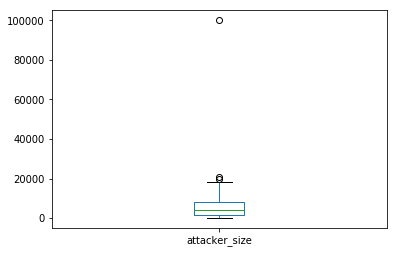

In [10]:
# 检查attacker_size是否有异常值
df['attacker_size'].plot(kind= 'box');

In [11]:
#查找attacker_size列中异常值所在index
df['attacker_size'].idxmax()

27

In [12]:
#打印出异常值所在行的信息，查看是否合理
df.iloc[27]

name                                             Battle of Castle Black
year                                                                300
battle_number                                                        28
attacker_king                                         Stannis Baratheon
defender_king                                              Mance Rayder
attacker_1                                                    Free folk
defender_1                                                Night's Watch
attacker_outcome                                                   loss
battle_type                                                       siege
major_death                                                           1
major_capture                                                         1
attacker_size                                                    100000
defender_size                                                      1240
attacker_commander    Mance Rayder, Tormund Giantsbane, Harma Do

从上面信息可以看出，攻击力量大小在100000,防守方力量在1240情况下，攻击方在这场战争中失败了，可以判定这个是一个异常值。

In [13]:
#删除attacker_size中的异常值100000
df['attacker_size'].replace(100000,np.nan,inplace = True)

<a id = "exploration">

## 4. 数据探索分析

### 问题1：哪一个区域发生了最多的战争？

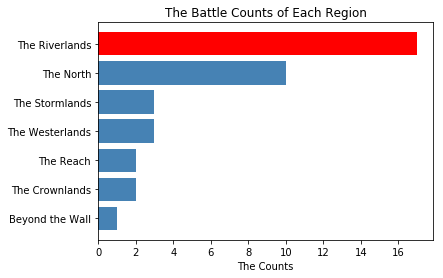

In [17]:
y = df['region'].value_counts(ascending = True) # 每个区域发生战争的次数统计出来，并按从小到大排序
y_pos = range(len(y)) # y坐标的位置
y_labels = y.index # y坐标的图标
color = ['steelblue','steelblue','steelblue','steelblue','steelblue','steelblue','red']
plt.barh(y_pos, y, color = color); #绘制水平柱状图
plt.yticks(y_pos, y_labels); # 给Y坐标的值添加labels
plt.title('The Battle Counts of Each Region'); #图标题
plt.xlabel('The Counts'); # x轴

**由上面每个区域发生战争次数图可知**： 在The Riverlands区域发生了最多的战争，共17次。

### 问题2：哪一个国王获得了最多的胜利？

In [18]:
#获得胜利，从两个角度，一个站在攻击方角度，一个是防御方角度
df_win = df[df['attacker_outcome']=='win'] #将攻击方获胜的战争筛选存在df_win里
df_loss = df[df['attacker_outcome']=='loss'] #将防守方获胜的战争筛选在df_loss里
attacker_king_counts = df_win['attacker_king'].value_counts() # 攻击方获胜的次数
defender_king_counts = df_loss['defender_king'].value_counts() # 防守方获胜的次数
king_win_counts = attacker_king_counts.add(defender_king_counts, fill_value = 0) #攻击方获胜次数和防守方获胜次数按国王名称合并 
king_win_counts

Balon/Euron Greyjoy          7.0
Joffrey/Tommen Baratheon    16.0
Mance Rayder                 1.0
Robb Stark                   9.0
Stannis Baratheon            2.0
dtype: float64

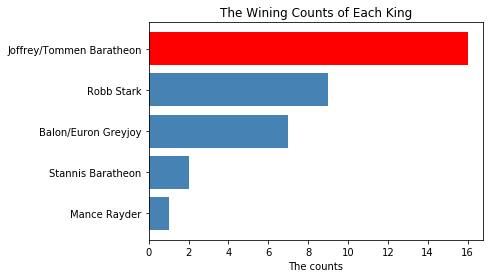

In [20]:
y = king_win_counts.sort_values(ascending = True) # 对国王获胜次数统计从小到大排序
y_pos=range(len(y)) 
y_labels = y.index
color = color = ['steelblue','steelblue','steelblue','steelblue','red']
plt.barh(y_pos,y,color =color);#水平柱状图
plt.yticks(y_pos,y_labels);
plt.title('The Wining Counts of Each King');
plt.xlabel('The counts');

**由上面每个国王获胜次数图可知：** Joffrey/Tommen Baratheon 国王获胜次数最多，共16次。

### 问题3：战争的胜利与否受那些关键因素的影响？

- **战争胜利与否与战争类型有关系**

In [21]:
#战争获胜情况下，各类型战争类型数量
x_win = df[df['attacker_outcome']=='win']['battle_type'].value_counts() 
ind = list(x_win.index)

In [22]:
#战争失败情况下，对应的各类型战争
x_loss = df[df['attacker_outcome']=='loss']['battle_type'].value_counts()
x_loss

pitched battle    4
siege             1
Name: battle_type, dtype: int64

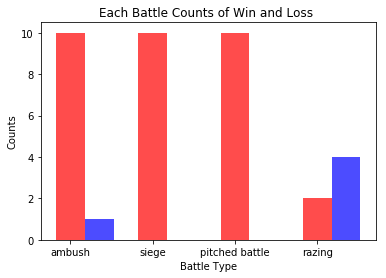

In [28]:
x_pos = list(range(len(x_win)))
width = 0.35
plt.bar(x_pos, x_win, width,color = 'r',alpha = .7, label = 'win');
plt.bar([3.35,0.35], x_loss, width, color = 'b', alpha = .7, label = 'loss');
plt.xticks(x_pos, ind);
plt.xlabel('Battle Type');
plt.ylabel('Counts');
plt.title('Each Battle Counts of Win and Loss ');

**红色为获胜， 蓝色为失败**

**从上图可以看出：**在siege,ambush,pitched battle类型战役中，获胜可能性更高， 但在razing类型战争中， 更可能失败。

- **战争胜利与否与攻击方力量和防御方力量大小的关系**

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


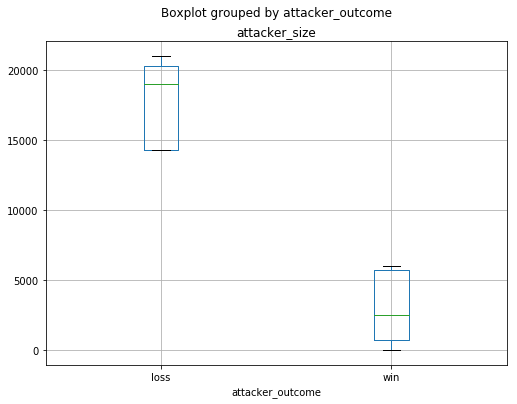

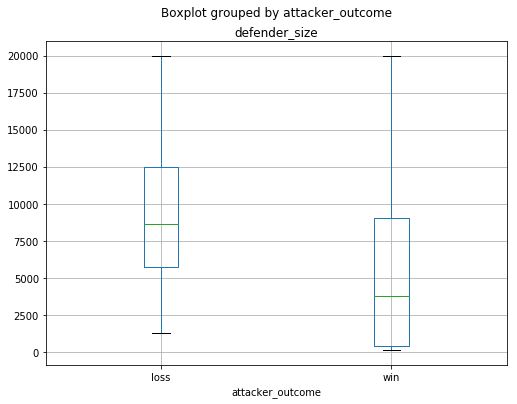

In [24]:
df.boxplot(column='attacker_size', by='attacker_outcome', showfliers=False, figsize=(8, 6))
df.boxplot(column='defender_size', by='attacker_outcome', showfliers=False, figsize=(8, 6));

**由上图可知：** 无论攻击方力量和防御方力量相对小，获胜可能性大

### 问题4：攻击方力量大小和防御方力量大小有什么关系？

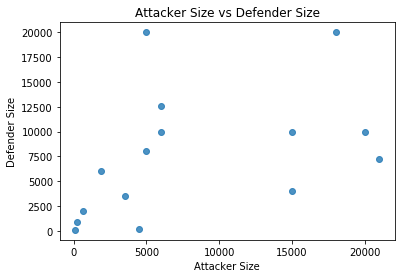

In [25]:
x = df['attacker_size']
y = df['defender_size']
plt.scatter(x, y, alpha = 0.8);
plt.ylabel('Defender Size');
plt.xlabel('Attacker Size');
plt.title('Attacker Size vs Defender Size');

In [26]:
df[['attacker_size','defender_size']].corr()

,attacker_size,defender_size
attacker_size,1.000000,0.438731
defender_size,0.438731,1.000000


**由上图可知：** 攻击方力量大小和防守方力量大小具有一定相关性，相关系数是0.4.，属于低度相关。

<a id="conculsion">

## 5. 结论

**问题1**：哪一个区域发生了最多的战争？

**答案**：在The Riverlands区域发生了最多的战争，共17次。


**问题2**：哪一个国王获得了最多的胜利？

**答案**：Joffrey/Tommen Baratheon 国王获胜次数最多，共16次。


**问题3**：战争的胜利与否受那些关键因素的影响？

**答案**：
- 根据当前数据集，绘制箱线图，攻击方力量按失败和胜利分成两组，可以得出攻击方力量在失败组中更大一些相比于胜利组；防守方力量按失败和胜利分成两组，可以得出防守方力量在失败组中更大一些相比于胜利组；所以可以得出，无论攻击方还是防守方力量大小，力量相对小，可能在战争中获胜。
- 战争获胜与否与战争类型的关系，做柱状图分析，在siege,ambush,pitched battle类型战役中，获胜可能性更高， 但在razing类型战争中， 更可能失败。


**问题4**：攻击方力量大小和防御方力量大小有什么关系？

**答案**：攻击方力量大小和防御方力量大小有有低度的正相关性，相关系数约是0.4。


<a id = "reflection">

## 6. 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：
1. 数据集相对完整，包含了所需要绝大多数数据。
2. 数据集有57个缺失值， 特别是attacker_2、attacker_3、attacker_4、defender_2、defender_3、defender_4、note列的数据，因为其数量小，意义不大,删除，不影响分析。
3. 分析了战争类型，攻击方和防御方力量大小与战争胜负的相关关系，只探索了他们之间的相互关系，而不是他们之间的因果关系。


**参考：**
1. [Kaggle的Game of Thrones项目](https://www.kaggle.com/mylesoneill/game-of-thrones)
2. [StackOverFlow网站](https://stackoverflow.com)